In [1]:
#from: https://github.com/iShkiper/DSP_24.M20_21/blob/main/%D0%9A%D0%BE%D0%B4/1.0%20SVD_on.ipynb

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X, Y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 42)

X_train.shape

(1437, 64)

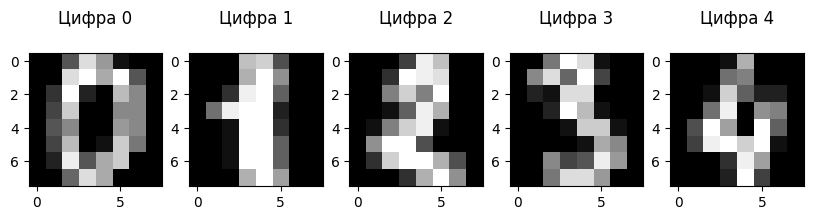

In [3]:
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(X[0:5], Y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Цифра %i\n' % label, fontsize = 12)


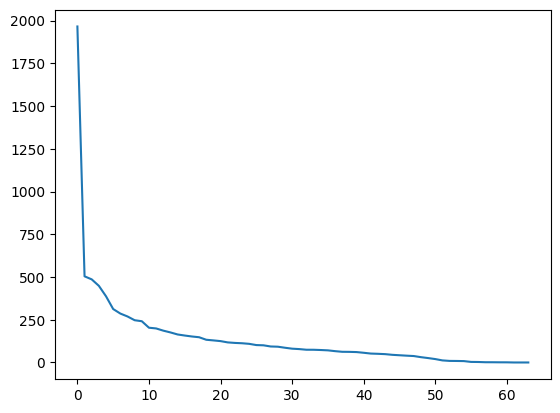

In [8]:
from sklearn.decomposition import TruncatedSVD

d = 64
svd = TruncatedSVD(n_components=d)
X_new = svd.fit_transform(X_train)

#plt.plot(svd.singular_values_)

In [9]:
X_new.shape

(1437, 64)

In [50]:
# no svd knn

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy with SVD:", accuracy)


Accuracy with SVD: 0.9638888888888889


In [51]:
#search for d: 1%


for d in range(1,63):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svd = TruncatedSVD(n_components=d, random_state=42)  # выбираем количество компонент
    X_train_svd = svd.fit_transform(X_train_scaled)
    X_test_svd = svd.transform(X_test_scaled)


    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_svd, y_train)
    
    accuracy_cur = knn.score(X_test_svd, y_test)
    print("Accuracy (score method):", accuracy)
    if abs(accuracy-accuracy_cur)<0.01:
        print("Minimal d value:",d)
        break
    
    
    

Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Accuracy (score method): 0.9638888888888889
Minimal d value: 14


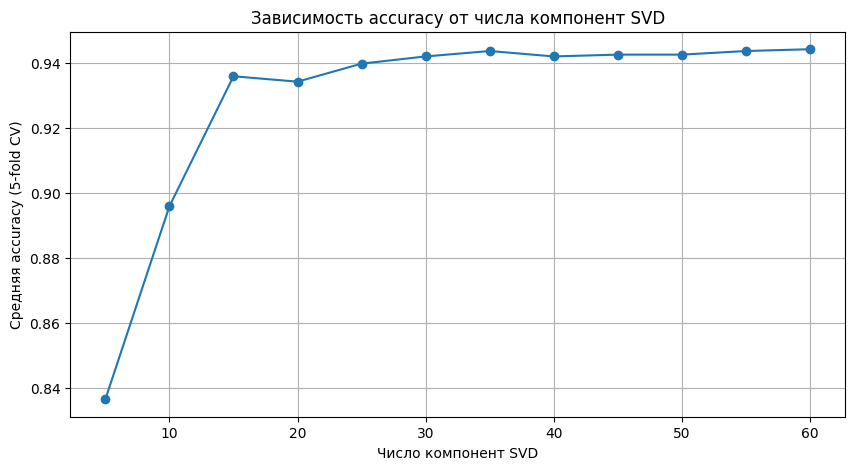

In [52]:
#GPT - cross-validation variant
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Загрузка и масштабирование данных
digits = load_digits()
X, y = digits.data, digits.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перебор по количеству компонент
component_range = range(5, 65, 5)  # от 5 до 60 с шагом 5
scores = []

for n in component_range:
    svd = TruncatedSVD(n_components=n, random_state=42)
    X_reduced = svd.fit_transform(X_scaled)
    
    knn = KNeighborsClassifier(n_neighbors=3)
    cv_scores = cross_val_score(knn, X_reduced, y, cv=5)  # 5-кратная кросс-валидация
    scores.append(np.mean(cv_scores))

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.plot(component_range, scores, marker='o')
plt.title("Зависимость accuracy от числа компонент SVD")
plt.xlabel("Число компонент SVD")
plt.ylabel("Средняя accuracy (5-fold CV)")
plt.grid(True)
plt.show()
